In [1]:
import scipy
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from matplotlib.widgets import RectangleSelector
from scipy.interpolate import RectBivariateSpline

%matplotlib notebook

In [2]:
pos = 0
pos_tmp = 0

def get_line_position(start_point,end_point):
    pos = np.array((start_point,end_point))
    return pos

def draw_selected_line(pos):
    """Draw the line by provided points
    
    Pos[:,0]: a list of x coordinate
    Pos[:,1]: a list of y coordinate
    
    """
    ax = plt.gca()
    ax.plot(pos[:,0],pos[:,1])
    
def points_on_line(pos,data):
    x1 = pos[0,0]
    y1 = pos[0,1]
    x2 = pos[1,0]
    y2 = pos[1,1]

    Xs = np.arange(x1,x2)
    Ys = y2+(Xs-x2)*(y1-y2)/(x1-x2)
    
    gridy, gridx = range(data.shape[0]), range(data.shape[1])
    interp_f = RectBivariateSpline(gridy, gridx, data)
    Zs = interp_f.ev(Ys,Xs)
#     pos_on_line = np.vstack(Xs,Ys)
    return (Xs,Ys),Zs
    
def onselect(eclick, erelease):
    # eclick and erelease are matplotlib events at press and release.
    global pos
    
    print('startposition: (%f, %f)' % (eclick.xdata, eclick.ydata))
    print('endposition  : (%f, %f)' % (erelease.xdata, erelease.ydata))
    print('used button  : ', eclick.button)
    
    pos = get_line_position((eclick.xdata, eclick.ydata),(erelease.xdata, erelease.ydata))
    draw_selected_line(pos)

def toggle_selector(event):
    print('Key pressed.')
    if event.key in ['Q', 'q'] and toggle_selector.RS.active:
        print('RectangleSelector deactivated.')
        toggle_selector.RS.set_active(False)
    if event.key in ['A', 'a'] and not toggle_selector.RS.active:
        print('RectangleSelector activated.')
        toggle_selector.RS.set_active(True)
        
def onselect_2(eclick, erelease):
    # eclick and erelease are matplotlib events at press and release.
    global pos_tmp
    
    print('startposition: (%f, %f)' % (eclick.xdata, eclick.ydata))
    print('endposition  : (%f, %f)' % (erelease.xdata, erelease.ydata))
    print('used button  : ', eclick.button)
    
    pos_tmp = get_line_position((eclick.xdata, eclick.ydata),(erelease.xdata, erelease.ydata))
        
def toggle_selector_2(event):
    global pos,pos_tmp
    print('Key pressed.')
    if event.key in ['Q', 'q'] and toggle_selector.RS.active:
        print('RectangleSelector deactivated.')
        toggle_selector.RS.set_active(False)
    if event.key in ['A', 'a'] and not toggle_selector.RS.active:
        print('RectangleSelector activated.')
        toggle_selector.RS.set_active(True)
    if event.key in ['ctrl+l', 'ctrl+L'] and toggle_selector.RS.active:
        pos = pos_tmp
        draw_selected_line(pos)

In [3]:
pattern = np.load('pattern_2.npy')

## First try with default parameters
Two problems found:
1. `print` called in `onselect` function doesn't work in notebook backend: nothing showed up after drawing the line.
2. It seems that one cannot draw the selection from lower left to upper right.

<IPython.core.display.Javascript object>


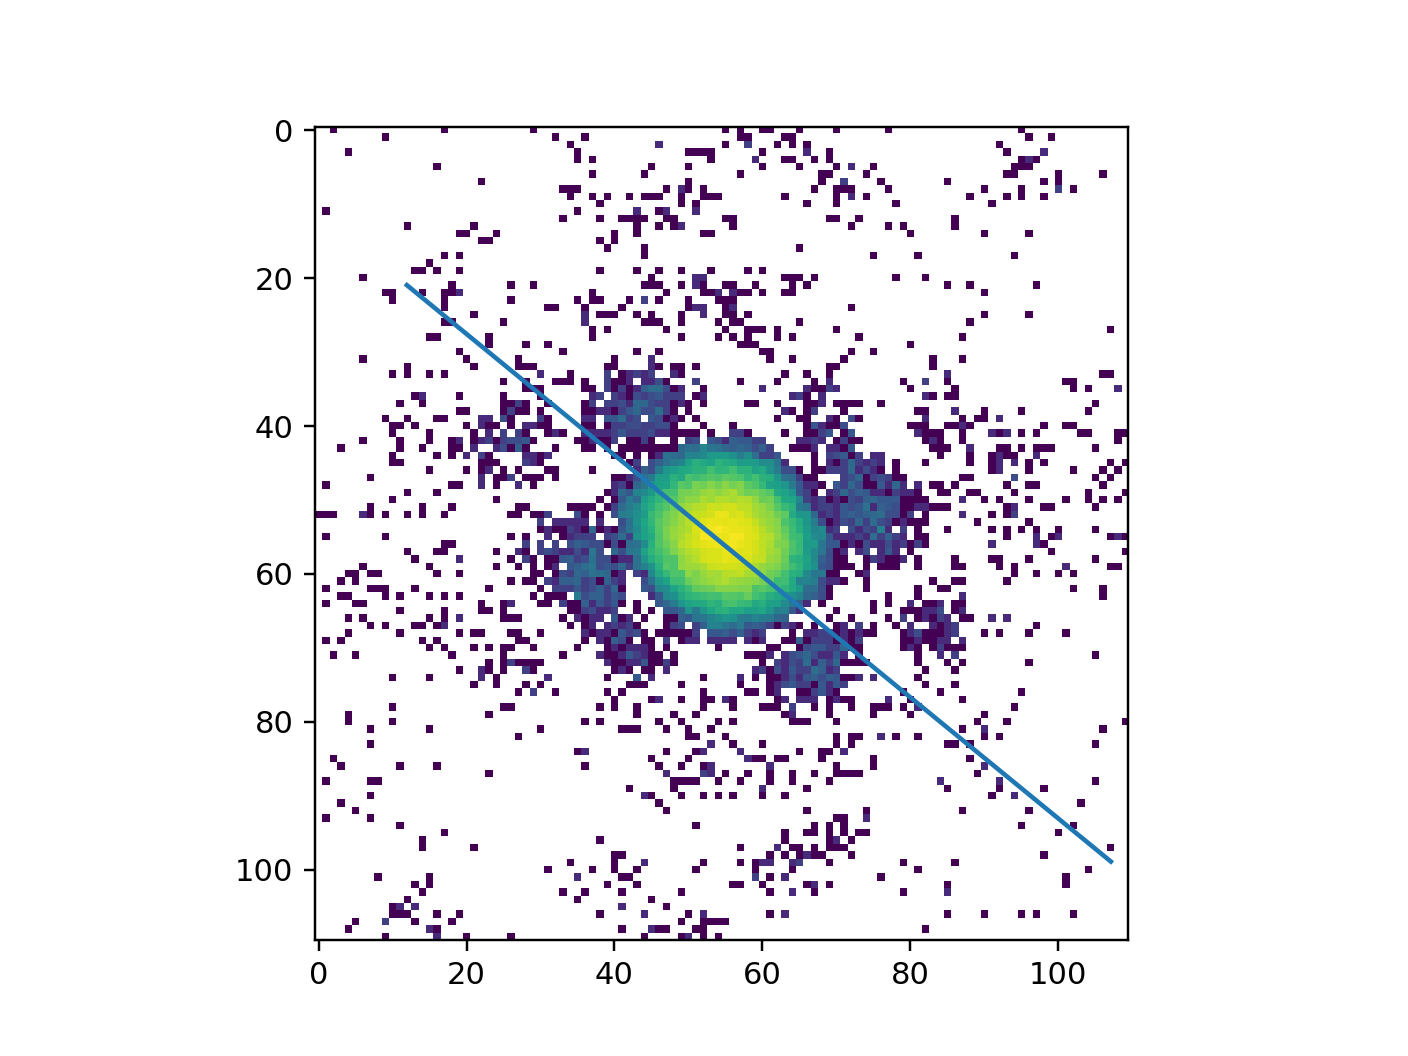

14

In [4]:
fig,ax = plt.subplots()
ax.imshow(pattern,norm=LogNorm())

# rectangle_selector
toggle_selector.RS = RectangleSelector(ax, onselect, drawtype='line',interactive=False,useblit=True)
fig.canvas.mpl_connect('key_press_event', toggle_selector)

[[ 11.921875    20.93009768]
 [107.15997024  98.90628816]]


<IPython.core.display.Javascript object>


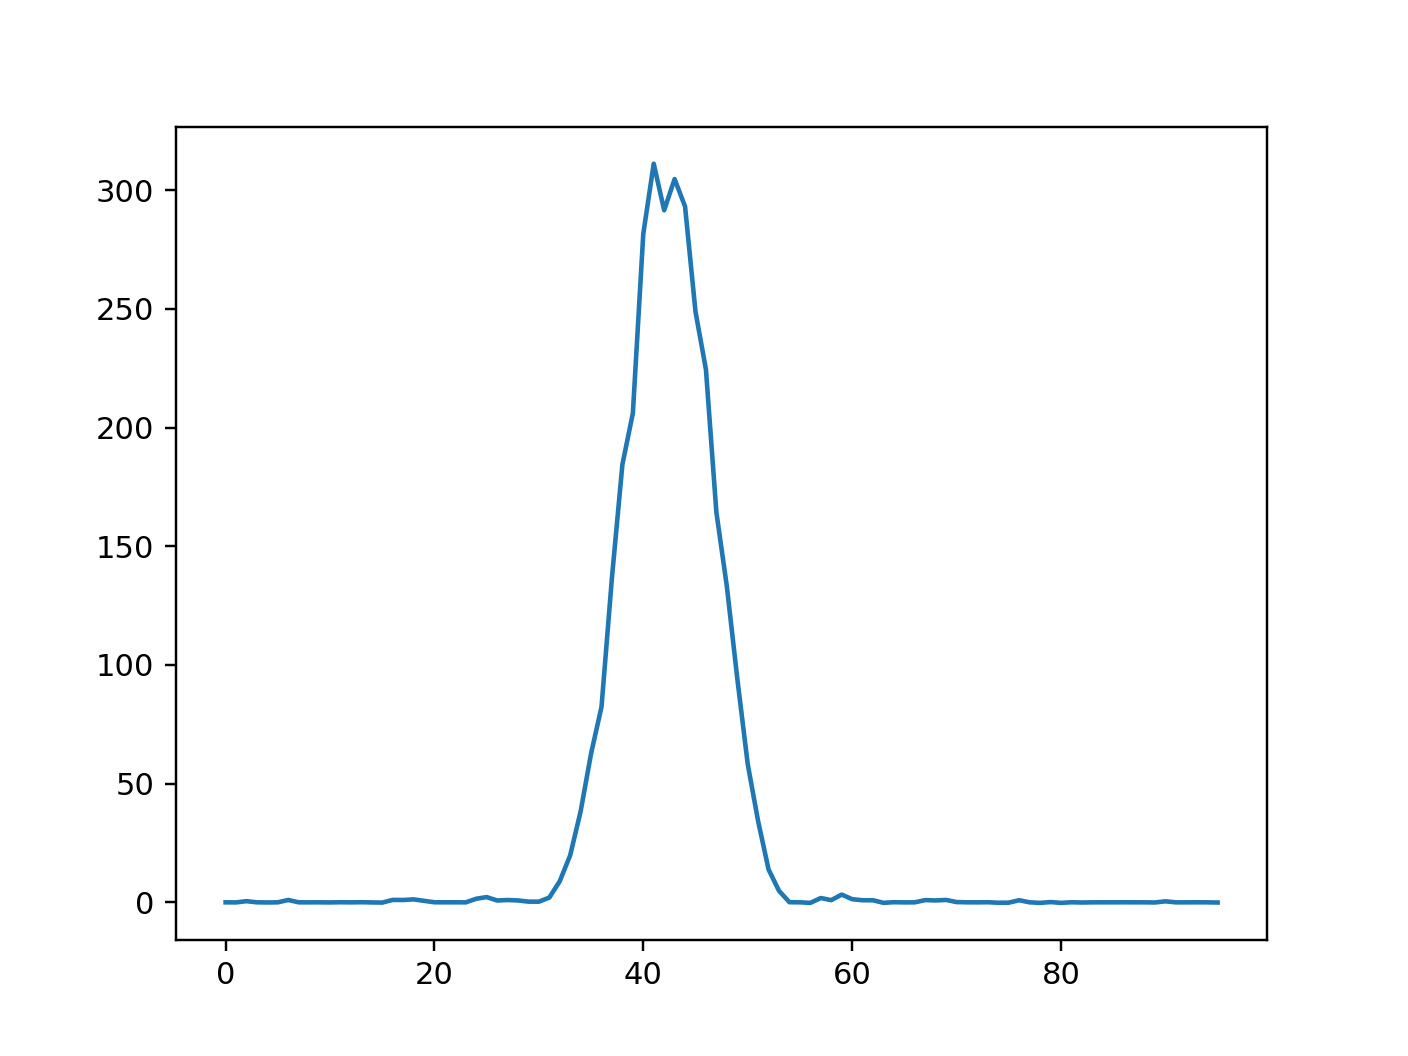

In [5]:
print (pos)
(xS,yS),zS = points_on_line(pos,pattern)
plt.figure()
plt.plot(zS)

## Using `interactive=True` and key event to confirm the selection
After drawing a line, press "ctrl+l" to confirm the selection.

"ESC" can cancel the current selection

<IPython.core.display.Javascript object>


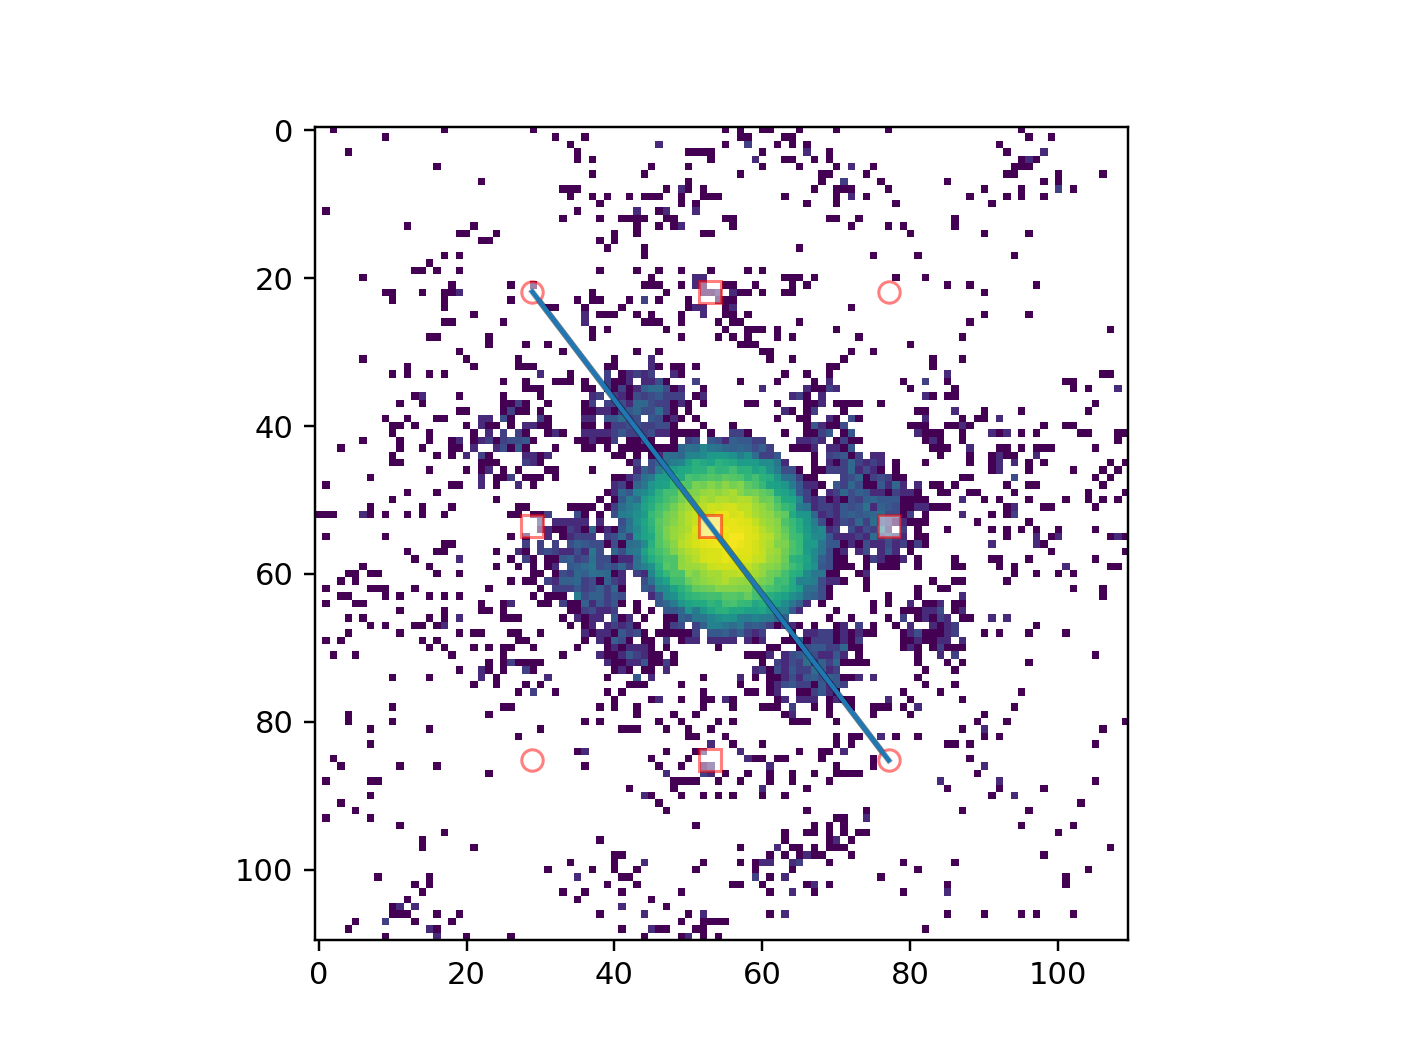

In [8]:
fig,ax = plt.subplots()
# ax.imshow(pattern,norm=LogNorm(),origin='lower')
ax.imshow(pattern,norm=LogNorm())

# rectangle_selector
toggle_selector.RS = RectangleSelector(ax, onselect_2, drawtype='line',
                                       interactive=True,useblit=False,spancoords='data')
fig.canvas.mpl_connect('key_press_event', toggle_selector_2)
plt.show()

[[28.88616071 21.81957155]
 [77.10044643 85.21242869]]


<IPython.core.display.Javascript object>


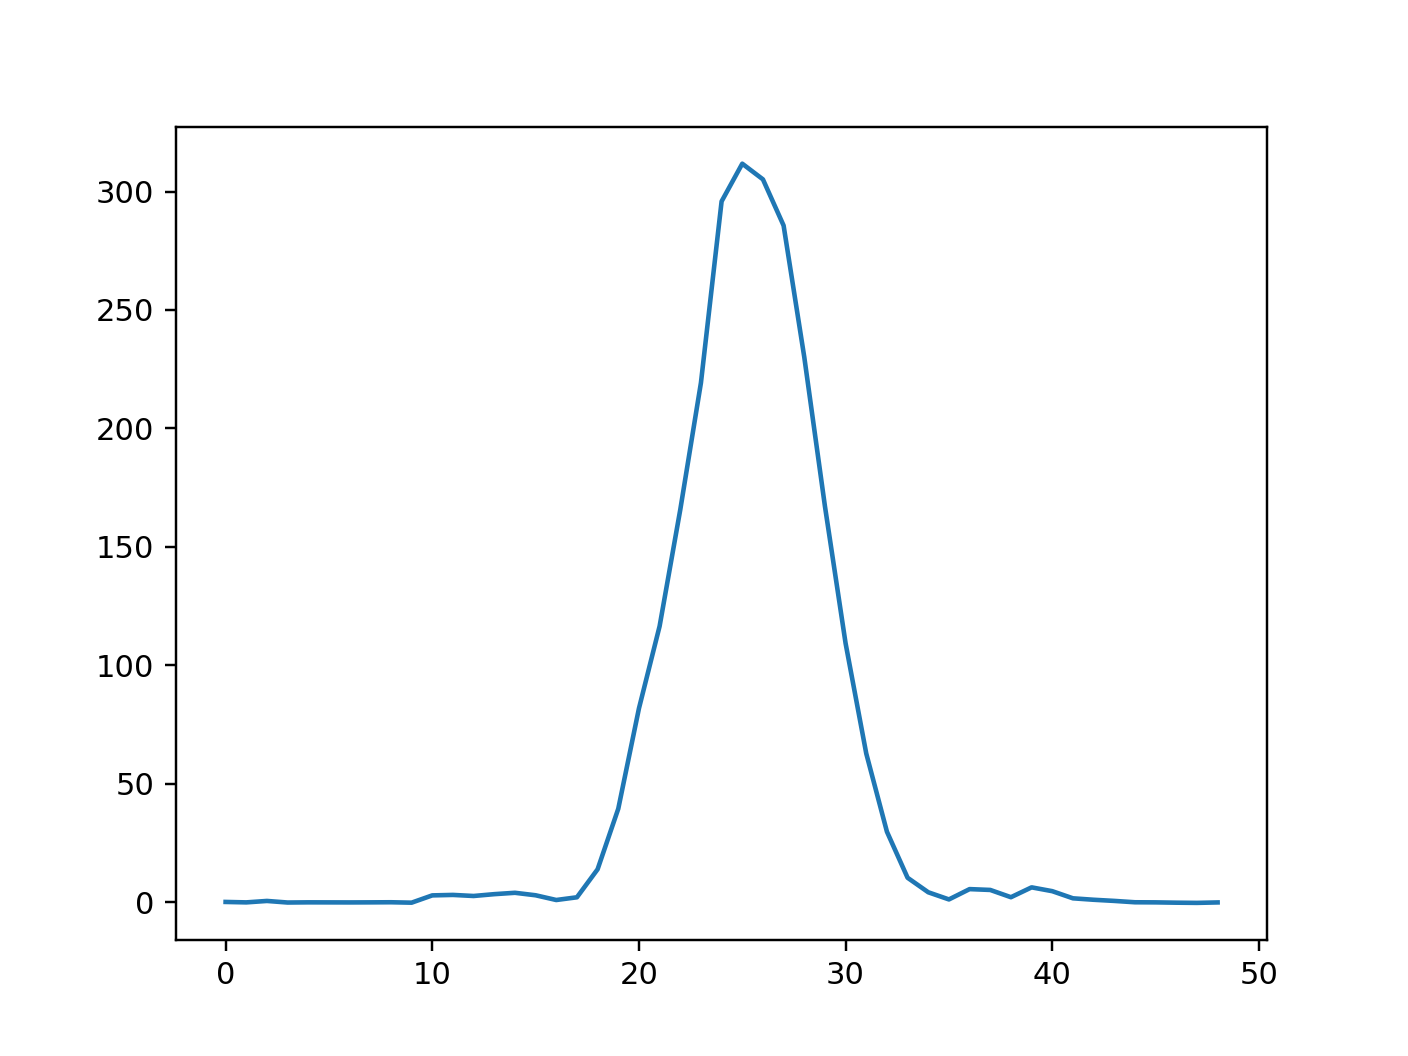

In [9]:
print (pos)
(xS,yS),zS = points_on_line(pos,pattern)
plt.figure()
plt.plot(zS)